In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import*
#import scipy.optimize as sp

In [2]:
#assuming values of x and y as experimental data
g=9.8
vo=20
xo=-10
np.random.seed(0)
t = np.linspace(0, 19, 40)#independant variable
#yexact = 1/2*g*t**2 + vo*t + xo
yexp = 1/2*g*t**2 + vo*t + xo + np.random.randn(t.shape[0])*50

####  using ipywidgets to interact manually

In [7]:
g=FloatSlider(description='$Acceleration$',min=0,max=15,step=0.1)
vo=IntSlider(description='$Speed$',min=0,max=40,step=1)
xo=IntSlider(description='$InitPosition$',min=0,max=40,step=1)
@interact()
def my_funct(g=g,vo=vo,xo=xo):
    yfit=(1/2)*g*t**2 + vo*t + xo
    label='g = {}\nvo = {}\nxo = {}'
    #plt.plot(t,yexact,'b^',label='exact_data')
    plt.plot(t,yexp,'go',label='exp_data')
    plt.plot(t,yfit,color='k',label=label.format(g,vo,xo),lw=3)
    plt.legend()
    plt.grid()
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='$Acceleration$', max=15.0), IntSlider(value=0, descr…

#### scipy curve fit

In [8]:
from scipy.optimize import curve_fit
def model(t,g,vo,xo):
    return (1/2)*g*t**2+vo*t+xo
fit_params=curve_fit(model,t,yexp)

In [9]:
gFit,voFit,xoFit=fit_params[0]
print('#Fitting parameters are:')
print(fit_params[0])

#Fitting parameters are:
[10.46944284 11.08877203 49.48925861]


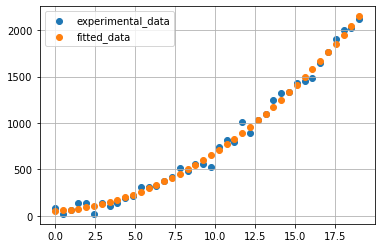

In [10]:
plt.scatter(t,yexp,label='experimental_data')
plt.scatter(t,model(t,gFit,voFit,xoFit),label='fitted_data')
plt.legend()
plt.grid();

#### auto noisy data fitting 

In [11]:
np.random.seed(0)
x=np.linspace(-10,10,51)
y=x**2+10*np.sin(x)
y_noise=y+5*np.random.randn(x.size)
def model_(x,a,b):
    return a*x**2+b*np.sin(x);

In [12]:
guess=[1,3]
params=curve_fit(model_,x,y_noise,guess)

In [13]:
a,b=params[0]
print('#Fitting parameters are:')
print('a:',round(a,6)) 
print('b:',round(b,6))

#Fitting parameters are:
a: 1.013573
b: 10.574845


In [14]:
y_fit=model_(x,a,b)

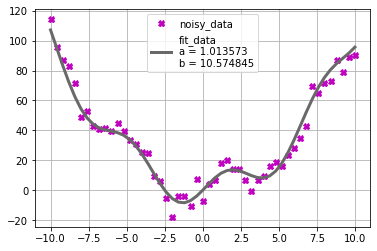

In [15]:
label='{}\na = {}\nb = {}'
plt.plot(x,y_noise,'mX',label='noisy_data')
plt.plot(x,y_fit,label=label.format('fit_data',round(a,6),round(b,6)),
         color='dimgray',lw=3)
plt.legend()
plt.grid()

#### manual noisy data fitting 

In [16]:
#y_noise=x**2+10*np.sin(x)+5*np.random.randn(x.size)
afit=FloatSlider(description='aValue',min=0,max=5,step=0.05)
bfit=FloatSlider(description='bValue',min=0,max=20,step=0.1)
label='{}\na: {}\nb: {}'
@interact()
def model_(a=afit,b=bfit):
    y_fit=a*x**2+b*np.sin(x)
    plt.plot(x,y_noise,'bX',ms=7,label='noisy_data')
    plt.plot(x,y_fit,label=label.format('fitted_data',afit.value,bfit.value),
             color='dimgray',lw=3)
    plt.legend()
    plt.grid();

interactive(children=(FloatSlider(value=0.0, description='aValue', max=5.0, step=0.05), FloatSlider(value=0.0,…